## This code performs a comprehensive molecular analysis with all techniques and processes thoroughly documented and elaborated upon

### We begin by finding out the Morgan Fingerprint of 62 known odorants to 3 OR51-like receptors and 250 known odorants. 


In [28]:
#installing the necessary libraries
!pip install rdkit
!pip install pandas


In [30]:

import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem


### This code calculates the Morgan Fingerprint of first dataset(the 62 odorants). Rdkit toolkit utilizes the SMILES notation feature to compute the Morgan fingerprint.

In [31]:

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('OR_AGONIST_update.csv')

# Create an empty list to store fingerprints
fingerprints = []

# Calculate Morgan fingerprint for each SMILES notation
for index, row in df.iterrows():
    smiles = row['SMILES']

    # Skip rows with missing or invalid SMILES strings (e.g., None)
    if not isinstance(smiles, str):
        fingerprints.append(None)
        continue

    mol = Chem.MolFromSmiles(smiles)

    # Check if MolFromSmiles successfully created a valid molecule object
    if mol is not None:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        fingerprints.append(fp.ToBitString())
    else:
        fingerprints.append(None)

# Add 'Fingerprint' column to the DataFrame and assign calculated fingerprints
df['Fingerprint'] = fingerprints

# Save updated DataFrame back to CSV file (overwrite existing file)
df.to_csv('OR_AGONIST_update2.csv', index=False)

print("Morgan fingerprint calculation completed!")
df.head(61)

Morgan fingerprint calculation completed!


,RECEPTOR,AGONIST,SMILES,Fingerprint
0,OR51E1,butyl butyryl lactate,CCCCOC(=O)C(C)OC(=O)CCC,0100000000000100000000000000000000000000000000...
1,NaN,valeric acid,CCCCC(=O)O,0000000000000000000000000000000000000000000000...
2,NaN,4-Methylvaleric acid,CC(C)CCC(=O)O,0100000000000000000000000000000000000000000000...
3,NaN,5-Norbornene-2-carboxylic acid,C1C2CC(C1C=C2)C(=O)O,0000000000000000000000000000000000000000000000...
4,NaN,2-Methylvaleric acid,CCCC(C)C(=O)O,0100000000000000000000000000000000000000000000...
...,...,...,...,...
56,NaN,propanoic acid,CCC(=O)O,0010000000000000000000000000000000000000000000...
57,NaN,19-hydroxyandrostenedione,CC12CCC3C(C1CCC2=O)CCC4=CC(=O)CCC34CO,0000000100000000000000000000000000000000000000...
58,NaN,(E)-beta-Ionone,CC1=C(C(CCC1)(C)C)C=CC(=O)C,0000000000000000000000000000000100000000000000...
59,NaN,(E)-alpha-Ionone,CC1=CCCC(C1C=CC(=O)C)(C)C,0000000000000000000100000000000100000000000000...


### This code, similar to the previous code, calculates the Morgan Fingerprint of the 220 odorants.

In [32]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('Smiles.csv')

# Create an empty list to store fingerprints
fingerprints = []

# Calculate Morgan fingerprint for each SMILES notation
for index, row in df.iterrows():
    smiles = row['SMILES']

    # Skip rows with missing or invalid SMILES strings (e.g., None)
    if not isinstance(smiles, str):
        fingerprints.append(None)
        continue

    mol = Chem.MolFromSmiles(smiles)

    # Check if MolFromSmiles successfully created a valid molecule object
    if mol is not None:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        fingerprints.append(fp.ToBitString())
    else:
        fingerprints.append(None)

# Add 'Fingerprint' column to the DataFrame and assign calculated fingerprints
df['Fingerprint'] = fingerprints

# Save updated DataFrame back to CSV file (overwrite existing file)
df.to_csv('smilesfpm.csv', index=False)

print("Morgan fingerprint calculation completed!")
df.head(277)

Morgan fingerprint calculation completed!


,SMILES,Fingerprint
0,CSCCC=O,0000000000010000000000000000000000000000000000...
1,CCC(C)C=O,0100000000000000000000000000000000000000000000...
2,CC(=O)C(C)=O,0000000000000000000000000000000000000000000000...
3,CCCCC/C=C/C=C/C=O,0000000000000000000000000000000000000000000000...
4,CC1OC(=C(O)C1=O)C,0000000000000000000000000000000000000000000000...
...,...,...
218,CCCSSCCC,0000000000000000000000000000000000000000000000...
219,CCOC(=O)CCC(C)C,0100000000000000000000000000000000000000000000...
220,CCOC(=O)CCSC,0000000000010000000000000000000000000000000000...
221,CCCC[C@@H](CC)CCC([O-])=O,0100000000000000000000000000000000000000000000...


### The next step is to apply Various distance metrics between the morgan fingerprints of the above datasets for similarity calculation and printing the molecules with the least distances.

#### The Distance metrics employed are - hamming distance, euclidean distance, cosine similarity and tanimoto distance.

In [33]:
    # Load the fingerprint files into dataframes
    df1 = pd.read_csv('OR_AGONIST_update2.csv')
    df2 = pd.read_csv('smilesfpm.csv')

    # Print unique SMILES in df1 and df2
    print("Unique SMILES in df1:", len(df1['SMILES'].unique()))
    print("Unique SMILES in df2:", len(df2['SMILES'].unique()))

    # Drop common SMILES from second dataset if any
    common_smiles = set(df1['SMILES']).intersection(set(df2['SMILES']))
    print("Common SMILES:", common_smiles)

    df2_filtered = df2[~df2['SMILES'].isin(common_smiles)].reset_index(drop=True)

Unique SMILES in df1: 57
Unique SMILES in df2: 220
Common SMILES: {'CCCCCCCC=O', 'CSSC', 'CCCCCC(=O)C=C', 'COC1=C(C=C(C=C1)CC=C)OC', 'CCCCCCO', 'CCCCCCCC(=O)OCC', 'COC1=CC=CC=C1O', 'C1=CC=C2C(=C1)C=CC(=O)O2', 'CCCCCCCCC=O', 'CCC=O'}


In [34]:
import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from sklearn.metrics.pairwise import pairwise_distances

def tanimoto_distance(u, v):
    intersection = np.bitwise_and(u, v)
    union = np.bitwise_or(u, v)

    return 1 - (np.count_nonzero(intersection) / np.count_nonzero(union))

def find_most_similar_molecules(file1_path: str, file2_path: str):
    # Load the fingerprint files into dataframes
    df1 = pd.read_csv(file1_path)
    df2 = pd.read_csv(file2_path)

	# Drop common SMILES from second dataset if any
    common_smiles = set(df1['SMILES']).intersection(set(df2['SMILES']))
    df2_filtered = df2[~df2['SMILES'].isin(common_smiles)].reset_index(drop=True)
    print("Common SMILES:", common_smiles)
	# Convert binary string fingerprints to RDKit ExplicitBitVect objects for both datasets
    fingerprints1 = [DataStructs.CreateFromBitString(fp) for fp in df1['Fingerprint']]
    fingerprints2 = [DataStructs.CreateFromBitString(fp) for fp in df2_filtered['Fingerprint']]

	# Convert fingerprint lists to numpy arrays
    fingerprints1_np = np.array([np.array(list(fp)) for fp in fingerprints1])
    fingerprints2_np = np.array([np.array(list(fp)) for fp in fingerprints2])

    print("Fingerprints1 shape:", fingerprints1_np.shape)
    print("Fingerprints2 shape:", fingerprints2_np.shape)
    print("df2_filtered shape:", df2_filtered.shape)
    print("Number of unique SMILES in df2_filtered:", len(df2_filtered['SMILES'].unique()))
    print("df2 shape:", df2.shape)
    print("Number of unique SMILES in df2:", len(df2['SMILES'].unique()))
	# Calculate Hamming distance matrix between two datasets using bitwise similarity measure
    hamming_dist_matrix=pairwise_distances(fingerprints1_np,fingerprints2_np, metric='hamming')
	# Calculate Tanimoto distance matrix using the custom function
    tanimoto_dist_matrix = np.zeros((len(df1), len(df2_filtered)))
    for i in range(len(df1)):
	    for j in range(len(df2_filtered)):
	        tanimoto_dist_matrix[i][j] = tanimoto_distance(fingerprints1_np[i], fingerprints2_np[j])

	# Calculate other distances (cosine distance, hyperbolic distance, and euclidean distance)
    cosine_dist_matrix = pairwise_distances(fingerprints1_np, fingerprints2_np, metric='cosine')

    euclidean_dist_matrix = pairwise_distances(fingerprints1_np, fingerprints2_np , metric='euclidean')

	# Create a dictionary to store similarity scores with SMILES strings for each distance metric
    similarity_scores_dict = {}

    for i in range(len(df1)):
	    similarity_scores_dict[i] ={
	        'Hamming Distance': hamming_dist_matrix[i].min(),
	        'Cosine Distance': cosine_dist_matrix[i].min(),
			'Euclidean Distance': euclidean_dist_matrix[i].min(),
			'Tanimoto Distance': tanimoto_dist_matrix[i].min()
	    }

    # Convert the dictionary to a dataframe
    similarity_df = pd.DataFrame(similarity_scores_dict).transpose()

    # Sort the dataframe based on all distances in ascending order
    sorted_similarity_df = similarity_df.sort_values(['Hamming Distance', 'Cosine Distance',
                                                     'Euclidean Distance', 'Tanimoto Distance'])

    # Print the most similar SMILES from dataset 2
    most_similar_smiles = df2_filtered.loc[sorted_similarity_df.index[:20], 'SMILES']
    # Print the most similar SMILES and their corresponding distance values from dataset 2
    most_similar_distances = sorted_similarity_df.iloc[:20]

    print("Most similar SMILES:")
    print(most_similar_smiles)
    print("\nDistance Values:")
    print(most_similar_distances)

    return most_similar_smiles, most_similar_distances

# Example usage:
file1_path = "OR_AGONIST_update2.csv"
file2_path = "smilesfpm.csv"

most_similar_molecules = find_most_similar_molecules(file1_path, file2_path)

Common SMILES: {'CCCCCCCC=O', 'CSSC', 'CCCCCC(=O)C=C', 'COC1=C(C=C(C=C1)CC=C)OC', 'CCCCCCO', 'CCCCCCCC(=O)OCC', 'COC1=CC=CC=C1O', 'C1=CC=C2C(=C1)C=CC(=O)O2', 'CCCCCCCCC=O', 'CCC=O'}
Fingerprints1 shape: (61, 2048)
Fingerprints2 shape: (212, 2048)
df2_filtered shape: (212, 2)
Number of unique SMILES in df2_filtered: 210
df2 shape: (223, 2)
Number of unique SMILES in df2: 220
Most similar SMILES:
8                         CC=O
11       COC1=C(C=CC(=C1)C=O)O
17                 CCCC(=O)OCC
18                 CC\C=C/CC=O
22           C1=CC=C(C=C1)CC=O
23               CCOC(=O)C(C)C
25           CCC1=NC=C(N=C1C)C
31           CC/C=C/CC\C=C\C=O
33          CC(C)C1=NC=CN=C1OC
36                         CSC
37       COC1=C(C=CC(=C1)C=C)O
38                          CS
40           CCCCCC1CCCC(=O)O1
42        CCCCC[C@H]1CCC(=O)O1
46                         CCO
58                 CCCCCC(O)=O
56    CCCC[C@H]1OC(=O)C[C@H]1C
1                    CCC(C)C=O
12              CC(=O)C1=NCCC1
55           

### This is repeated for two more datasets.

In [35]:
import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from sklearn.metrics.pairwise import pairwise_distances


In [36]:
def tanimoto_distance(u, v):
    intersection = np.bitwise_and(u, v)
    union = np.bitwise_or(u, v)

    return 1 - (np.count_nonzero(intersection) / np.count_nonzero(union))

def find_most_similar_molecules(file1_path: str, file2_path: str):
    # Load the fingerprint files into dataframes
    df1 = pd.read_csv(file1_path)
    df2 = pd.read_csv(file2_path)

	# Drop common SMILES from second dataset if any
    common_smiles = set(df1['SMILES']).intersection(set(df2['SMILES']))
    df2_filtered = df2[~df2['SMILES'].isin(common_smiles)].reset_index(drop=True)

	# Convert binary string fingerprints to RDKit ExplicitBitVect objects for both datasets
    fingerprints1 = [DataStructs.CreateFromBitString(fp) for fp in df1['Fingerprint']]
    fingerprints2 = [DataStructs.CreateFromBitString(fp) for fp in df2_filtered['Fingerprint']]

	# Convert fingerprint lists to numpy arrays
    fingerprints1_np = np.array([np.array(list(fp)) for fp in fingerprints1])
    fingerprints2_np = np.array([np.array(list(fp)) for fp in fingerprints2])

	# Calculate Hamming distance matrix between two datasets using bitwise similarity measure
    hamming_dist_matrix=pairwise_distances(fingerprints1_np,fingerprints2_np, metric='hamming')
	# Calculate Tanimoto distance matrix using the custom function
    tanimoto_dist_matrix = np.zeros((len(df1), len(df2_filtered)))
    for i in range(len(df1)):
	    for j in range(len(df2_filtered)):
	        tanimoto_dist_matrix[i][j] = tanimoto_distance(fingerprints1_np[i], fingerprints2_np[j])

	# Calculate other distances (cosine distance, hyperbolic distance, and euclidean distance)
    cosine_dist_matrix = pairwise_distances(fingerprints1_np, fingerprints2_np, metric='cosine')
    euclidean_dist_matrix = pairwise_distances(fingerprints1_np, fingerprints2_np , metric='euclidean')
	# Create a dictionary to store similarity scores with SMILES strings for each distance metric
    similarity_scores_dict = {}

    for i in range(len(df1)):
	    similarity_scores_dict[i] ={
	        'Hamming Distance': hamming_dist_matrix[i].min(),
	        'Cosine Distance': cosine_dist_matrix[i].min(),
			'Euclidean Distance': euclidean_dist_matrix[i].min(),
			'Tanimoto Distance': tanimoto_dist_matrix[i].min()
	    }

    # Convert the dictionary to a dataframe
    similarity_df = pd.DataFrame(similarity_scores_dict).transpose()

    # Sort the dataframe based on all distances in ascending order
    sorted_similarity_df = similarity_df.sort_values(['Hamming Distance', 'Cosine Distance',
                                                     'Euclidean Distance', 'Tanimoto Distance'])
    # Print the most similar SMILES from dataset 2
    most_similar_smiles = df2_filtered.loc[sorted_similarity_df.index[:10], 'SMILES']
    # Print the most similar SMILES and their corresponding distance values from dataset 2
    most_similar_distances = sorted_similarity_df.iloc[:10]

    print("Most similar SMILES:")
    print(most_similar_smiles)
    print("\nDistance Values:")
    print(most_similar_distances.round(20))

    return most_similar_smiles, most_similar_distances


# Example usage:
file1_path = "OR_AGONIST_update2.csv"
file2_path = "smilesfpm.csv"


most_similar_molecules = find_most_similar_molecules(file1_path, file2_path)

Most similar SMILES:
8                      CC=O
11    COC1=C(C=CC(=C1)C=O)O
17              CCCC(=O)OCC
18              CC\C=C/CC=O
22        C1=CC=C(C=C1)CC=O
23            CCOC(=O)C(C)C
25        CCC1=NC=C(N=C1C)C
31        CC/C=C/CC\C=C\C=O
33       CC(C)C1=NC=CN=C1OC
36                      CSC
Name: SMILES, dtype: object

Distance Values:
    Hamming Distance  Cosine Distance  Euclidean Distance  Tanimoto Distance
8                0.0              0.0                 0.0                0.0
11               0.0              0.0                 0.0                0.0
17               0.0              0.0                 0.0                0.0
18               0.0              0.0                 0.0                0.0
22               0.0              0.0                 0.0                0.0
23               0.0              0.0                 0.0                0.0
25               0.0              0.0                 0.0                0.0
31               0.0              0.0

### We make sure to check for common SMILES between the datasets using string mapping.

In [37]:
import pandas as pd
def mapping(file1_path: str, file2_path: str):
    # Load the fingerprint files into dataframes
    dataset1 = pd.read_csv(file1_path)
    dataset2 = pd.read_csv(file2_path)
dataset1 = pd.read_csv(file1_path)
dataset2 = pd.read_csv(file2_path)

# Perform string mapping to find common SMILES between datasets
common_smiles = set(dataset1['SMILES']).intersection(set(dataset2['SMILES']))

# Filter rows from both datasets based on common SMILES
filtered_dataset1 = dataset1[dataset1['SMILES'].isin(common_smiles)]
filtered_dataset2 = dataset2[dataset2['SMILES'].isin(common_smiles)]

# Merge filtered datasets on common SMILES
merged_dataset = pd.merge(filtered_dataset1, filtered_dataset2, on='SMILES', how='inner')

# Save merged dataset to a new CSV file
merged_dataset.to_csv('mapping.csv', index=False)
print(merged_dataset)
file1_path = "OR_AGONIST_update2.csv"
file2_path = "smilesfpm.csv"


   RECEPTOR             AGONIST                    SMILES  \
0       NaN            Coumarin  C1=CC=C2C(=C1)C=CC(=O)O2   
1       NaN             octanal                CCCCCCCC=O   
2       NaN      Methyl eugenol   COC1=C(C=C(C=C1)CC=C)OC   
3       NaN      Methyl eugenol   COC1=C(C=C(C=C1)CC=C)OC   
4       NaN     Ethyl caprylate           CCCCCCCC(=O)OCC   
5       NaN           1-Hexanol                   CCCCCCO   
6       NaN             nonanal               CCCCCCCCC=O   
7       NaN       1-octen-3-one             CCCCCC(=O)C=C   
8       NaN            Guaiacol            COC1=CC=CC=C1O   
9       NaN  Dimethyl disulfide                      CSSC   
10      NaN            Propanal                     CCC=O   

                                        Fingerprint_x  \
0   0000000000000000000000000000000000000000000000...   
1   0000000000000000000000000000000000000000000000...   
2   0000000000000000000000000000000000000000000000...   
3   00000000000000000000000000000000000

## Tanimoto distance is the more appropriate distance i the context of finding most similar molecules from the known odorants to our 62 SMILES. Therefore, we find the most similar SMILES to the 62 odorants.

##### When it comes to finding the most similar molecules using Morgan fingerprints, the Hamming distance becomes redundant. This is because the Morgan fingerprint is a hashed representation of molecular substructures, and each bit in the fingerprint does not directly correspond to the presence or absence of a specific feature. The concept of hamming distance is to measure the dissimilarity between two binary strings of equal length, by counting the number of positions at which the corresponding symbols are different

In [39]:
import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from sklearn.metrics.pairwise import pairwise_distances

def tanimoto_distance(u, v):
    intersection = np.bitwise_and(u, v)
    union = np.bitwise_or(u, v)

    return 1 - (np.count_nonzero(intersection) / np.count_nonzero(union))

def find_most_similar_molecules(file1_path: str, file2_path: str):
    # Load the fingerprint files into dataframes
    df1 = pd.read_csv(file1_path)
    df2 = pd.read_csv(file2_path)

	# Drop common SMILES from second dataset if any
    common_smiles = set(df1['SMILES']).intersection(set(df2['SMILES']))
    df2_filtered = df2[~df2['SMILES'].isin(common_smiles)].reset_index(drop=True)

	# Convert binary string fingerprints to RDKit ExplicitBitVect objects for both datasets
    fingerprints1 = [DataStructs.CreateFromBitString(fp) for fp in df1['Fingerprint']]
    fingerprints2 = [DataStructs.CreateFromBitString(fp) for fp in df2_filtered['Fingerprint']]


	# Convert fingerprint lists to numpy arrays
    fingerprints1_np = np.array([np.array(list(fp)) for fp in fingerprints1])
    fingerprints2_np = np.array([np.array(list(fp)) for fp in fingerprints2])
	# Calculate Tanimoto distance matrix using the custom function
    tanimoto_dist_matrix = np.zeros((len(df1), len(df2_filtered)))
    for i in range(len(df1)):
	    for j in range(len(df2_filtered)):
	        tanimoto_dist_matrix[i][j] = tanimoto_distance(fingerprints1_np[i], fingerprints2_np[j])

	# Create a dictionary to store similarity scores with SMILES strings for each distance metric
    similarity_scores_dict = {}

    for i in range(len(df1)):
	    similarity_scores_dict[i] ={'Tanimoto Distance': tanimoto_dist_matrix[i].min()
	    }

    # Convert the dictionary to a dataframe
    similarity_df = pd.DataFrame(similarity_scores_dict).transpose()

    # Sort the dataframe based on all distances in ascending order
    sorted_similarity_df = similarity_df.sort_values(['Tanimoto Distance'])

    # Print the most similar SMILES from dataset 2
    most_similar_smiles = df2_filtered.loc[sorted_similarity_df.index[:10], 'SMILES']
    most_similar_distances = sorted_similarity_df.iloc[:100]

    print("Most similar SMILES:")
    print(most_similar_smiles)
    print("\nDistance Values:")
    print(most_similar_distances.round(100))

    return most_similar_smiles, most_similar_distances

# Example usage:
file1_path = "OR_AGONIST_update2.csv"
file2_path = "smilesfpm.csv"

most_similar_molecules = find_most_similar_molecules(file1_path, file2_path)

Most similar SMILES:
23            CCOC(=O)C(C)C
42     CCCCC[C@H]1CCC(=O)O1
41             CC/C=C/CCC=O
40        CCCCCC1CCCC(=O)O1
38                       CS
37    COC1=C(C=CC(=C1)C=C)O
36                      CSC
33       CC(C)C1=NC=CN=C1OC
31        CC/C=C/CC\C=C\C=O
25        CCC1=NC=C(N=C1C)C
Name: SMILES, dtype: object

Distance Values:
    Tanimoto Distance
23           0.000000
42           0.000000
41           0.000000
40           0.000000
38           0.000000
..                ...
54           0.772727
49           0.787879
57           0.789474
3            0.833333
24           0.857143

[61 rows x 1 columns]


### The list of 62 known odorants is then appended with the 10 most similar SMILES to the dataset based on the tanimoto distance.

In [40]:
import pandas as pd

def create_similarity_csv(file1_path: str, file2_path: str, output_file: str):
    # Find the most similar molecules
    most_similar_molecules = find_most_similar_molecules(file1_path, file2_path)

    # Get the SMILES from both datasets
    smiles_dataset1 = pd.read_csv(file1_path)['SMILES']

    # Combine the most similar SMILES with their corresponding SMILES from dataset 1
    combined_smiles = pd.concat([smiles_dataset1, most_similar_molecules[0]], axis=0)

	# Save to CSV file
    combined_smiles.to_csv(output_file, index=False)

# Example usage:
output_file = "or_agonist_update_2.csv"
create_similarity_csv(file1_path, file2_path, output_file)

Most similar SMILES:
23            CCOC(=O)C(C)C
42     CCCCC[C@H]1CCC(=O)O1
41             CC/C=C/CCC=O
40        CCCCCC1CCCC(=O)O1
38                       CS
37    COC1=C(C=CC(=C1)C=C)O
36                      CSC
33       CC(C)C1=NC=CN=C1OC
31        CC/C=C/CC\C=C\C=O
25        CCC1=NC=C(N=C1C)C
Name: SMILES, dtype: object

Distance Values:
    Tanimoto Distance
23           0.000000
42           0.000000
41           0.000000
40           0.000000
38           0.000000
..                ...
54           0.772727
49           0.787879
57           0.789474
3            0.833333
24           0.857143

[61 rows x 1 columns]


# DESCRIPTOR CALCULATION -physicochemical features
## We then Calculate the physicochemical features of the obatined dataset using a mordred calculator

In [41]:
#installing necessary libraries required in calculating the descriptors
!pip install mordred
!pip install umap
!pip install tqdm
!pip install seaborn

In [42]:
import os,re,sys,pickle,datetime,time,random,itertools
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from scipy import stats
import math
from tqdm import tqdm
import seaborn as sns
import umap
from multiprocessing import freeze_support
import mordred
from mordred import Calculator, descriptors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA,NMF
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
import rdkit
from rdkit import Chem
from rdkit.Chem import DataStructs, AllChem, MolFromSmiles, PandasTools, Descriptors, Draw, PropertyMol, rdmolfiles, rdFMCS
from rdkit import RDConfig
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.Draw import MolsToGridImage, IPythonConsole, rdMolDraw2D
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions, Font
DrawingOptions.bondLineWidth=1.8
DrawingOptions.includeAtomNumbers=False
size = (150, 150)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image
randomstate = 42

In [43]:
filepath1 = "or_agonist_update_2.csv"
mols = pd.read_csv(filepath1)
mols

,SMILES
0,CCCCOC(=O)C(C)OC(=O)CCC
1,CCCCC(=O)O
2,CC(C)CCC(=O)O
3,C1C2CC(C1C=C2)C(=O)O
4,CCCC(C)C(=O)O
...,...
66,COC1=C(C=CC(=C1)C=C)O
67,CSC
68,CC(C)C1=NC=CN=C1OC
69,CC/C=C/CC\C=C\C=O


##### Dropping any duplicate SMILES there may be in the obtained dataset to remove any inefficacy.

In [44]:
mols = mols.drop_duplicates(subset=['SMILES'])
mols

,SMILES
0,CCCCOC(=O)C(C)OC(=O)CCC
1,CCCCC(=O)O
2,CC(C)CCC(=O)O
3,C1C2CC(C1C=C2)C(=O)O
4,CCCC(C)C(=O)O
...,...
66,COC1=C(C=CC(=C1)C=C)O
67,CSC
68,CC(C)C1=NC=CN=C1OC
69,CC/C=C/CC\C=C\C=O


In [45]:
mols['rdmol'] = mols['SMILES'].map(lambda x: Chem.MolFromSmiles(x))
mols['inchi'] = mols['rdmol'].map(Chem.MolToInchi)
mols = mols.drop_duplicates(subset="inchi")

print('Number of SMILES after duplicates removed:',len(mols))

mols

Number of SMILES after duplicates removed: 67


[01:46:21] WARNING: Omitted undefined stereo

[01:46:21] WARNING: Omitted undefined stereo

[01:46:21] WARNING: Omitted undefined stereo

[01:46:21] WARNING: Omitted undefined stereo

[01:46:21] WARNING: Omitted undefined stereo

[01:46:21] WARNING: Omitted undefined stereo

[01:46:21] WARNING: Omitted undefined stereo

[01:46:21] WARNING: Omitted undefined stereo

[01:46:21] WARNING: Omitted undefined stereo

[01:46:21] WARNING: Omitted undefined stereo

[01:46:21] WARNING: Omitted undefined stereo

[01:46:21] WARNING: Omitted undefined stereo

[01:46:21] WARNING: Omitted undefined stereo

[01:46:21] WARNING: Proton(s) added/removed

[01:46:21] WARNING: Omitted undefined stereo

[01:46:21] WARNING: Charges were rearranged

[01:46:21] WARNING: Omitted undefined stereo

[01:46:21] WARNING: Omitted undefined stereo

[01:46:21] WARNING: Omitted undefined stereo

[01:46:21] WARNING: Proton(s) added/removed

[01:46:21] WARNING: Omitted undefined stereo



,SMILES,rdmol,inchi
0,CCCCOC(=O)C(C)OC(=O)CCC,<rdkit.Chem.rdchem.Mol object at 0x00000291967...,InChI=1S/C11H20O4/c1-4-6-8-14-11(13)9(3)15-10(...
1,CCCCC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x00000291967...,"InChI=1S/C5H10O2/c1-2-3-4-5(6)7/h2-4H2,1H3,(H,..."
2,CC(C)CCC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x00000291967...,"InChI=1S/C6H12O2/c1-5(2)3-4-6(7)8/h5H,3-4H2,1-..."
3,C1C2CC(C1C=C2)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x00000291967...,InChI=1S/C8H10O2/c9-8(10)7-4-5-1-2-6(7)3-5/h1-...
4,CCCC(C)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x00000291967...,"InChI=1S/C6H12O2/c1-3-4-5(2)6(7)8/h5H,3-4H2,1-..."
...,...,...,...
66,COC1=C(C=CC(=C1)C=C)O,<rdkit.Chem.rdchem.Mol object at 0x00000291967...,InChI=1S/C9H10O2/c1-3-7-4-5-8(10)9(6-7)11-2/h3...
67,CSC,<rdkit.Chem.rdchem.Mol object at 0x00000291967...,InChI=1S/C2H6S/c1-3-2/h1-2H3
68,CC(C)C1=NC=CN=C1OC,<rdkit.Chem.rdchem.Mol object at 0x00000291967...,InChI=1S/C8H12N2O/c1-6(2)7-8(11-3)10-5-4-9-7/h...
69,CC/C=C/CC\C=C\C=O,<rdkit.Chem.rdchem.Mol object at 0x00000291967...,"InChI=1S/C9H14O/c1-2-3-4-5-6-7-8-9-10/h3-4,7-9..."


In [46]:
def embed(mol):
    mol_with_H = Chem.AddHs(mol)
    Chem.AllChem.EmbedMolecule(mol_with_H)
    Chem.AllChem.MMFFOptimizeMolecule(mol_with_H)
    return mol_with_H

mols['rdmol_optimized'] = mols.rdmol.map(embed)

mols

,SMILES,rdmol,inchi,rdmol_optimized
0,CCCCOC(=O)C(C)OC(=O)CCC,<rdkit.Chem.rdchem.Mol object at 0x00000291967...,InChI=1S/C11H20O4/c1-4-6-8-14-11(13)9(3)15-10(...,<rdkit.Chem.rdchem.Mol object at 0x00000291967...
1,CCCCC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x00000291967...,"InChI=1S/C5H10O2/c1-2-3-4-5(6)7/h2-4H2,1H3,(H,...",<rdkit.Chem.rdchem.Mol object at 0x00000291967...
2,CC(C)CCC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x00000291967...,"InChI=1S/C6H12O2/c1-5(2)3-4-6(7)8/h5H,3-4H2,1-...",<rdkit.Chem.rdchem.Mol object at 0x00000291967...
3,C1C2CC(C1C=C2)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x00000291967...,InChI=1S/C8H10O2/c9-8(10)7-4-5-1-2-6(7)3-5/h1-...,<rdkit.Chem.rdchem.Mol object at 0x00000291967...
4,CCCC(C)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x00000291967...,"InChI=1S/C6H12O2/c1-3-4-5(2)6(7)8/h5H,3-4H2,1-...",<rdkit.Chem.rdchem.Mol object at 0x00000291967...
...,...,...,...,...
66,COC1=C(C=CC(=C1)C=C)O,<rdkit.Chem.rdchem.Mol object at 0x00000291967...,InChI=1S/C9H10O2/c1-3-7-4-5-8(10)9(6-7)11-2/h3...,<rdkit.Chem.rdchem.Mol object at 0x00000291967...
67,CSC,<rdkit.Chem.rdchem.Mol object at 0x00000291967...,InChI=1S/C2H6S/c1-3-2/h1-2H3,<rdkit.Chem.rdchem.Mol object at 0x00000291967...
68,CC(C)C1=NC=CN=C1OC,<rdkit.Chem.rdchem.Mol object at 0x00000291967...,InChI=1S/C8H12N2O/c1-6(2)7-8(11-3)10-5-4-9-7/h...,<rdkit.Chem.rdchem.Mol object at 0x00000291967...
69,CC/C=C/CC\C=C\C=O,<rdkit.Chem.rdchem.Mol object at 0x00000291967...,"InChI=1S/C9H14O/c1-2-3-4-5-6-7-8-9-10/h3-4,7-9...",<rdkit.Chem.rdchem.Mol object at 0x00000291967...


##### The descriptors are Caluclated after the mordred calculator was defined.

In [47]:
calc = Calculator(descriptors) # create calculator for all mordred descriptors (can also specify subtype)

df=calc.pandas(mols['rdmol_optimized'])
print(df)

100%|██████████| 67/67 [00:04<00:00, 16.25it/s]


                                                  ABC  \
0   module 'numpy' has no attribute 'float'.\n`np....   
1   module 'numpy' has no attribute 'float'.\n`np....   
2   module 'numpy' has no attribute 'float'.\n`np....   
3   module 'numpy' has no attribute 'float'.\n`np....   
4   module 'numpy' has no attribute 'float'.\n`np....   
..                                                ...   
66  module 'numpy' has no attribute 'float'.\n`np....   
67  module 'numpy' has no attribute 'float'.\n`np....   
68  module 'numpy' has no attribute 'float'.\n`np....   
69  module 'numpy' has no attribute 'float'.\n`np....   
70  module 'numpy' has no attribute 'float'.\n`np....   

                                                ABCGG  nAcid  nBase  \
0   module 'numpy' has no attribute 'float'.\n`np....      0      0   
1   module 'numpy' has no attribute 'float'.\n`np....      1      0   
2   module 'numpy' has no attribute 'float'.\n`np....      1      0   
3   module 'numpy' has no attri

#### Now we deploy measures to keep only the more relevant/feature defining descriptors.This is done as later we perform PCA on the descriptors of the SMILES.

##### Replacing any mordred errors after replacing them with NaNs and dropping them.

In [48]:
#Replace mordred errors with NaNs then drop those descriptors/columns
df=df.applymap(lambda x: np.nan if type(x) in [mordred.error.Missing,mordred.error.Error] else x)
df=df.dropna(axis=1)
print(df.shape)

(67, 1218)


##### Dropping single value columnns

In [49]:
#Dropping columns that have a single value
non_zero_std = df.std() != 0
df = df [non_zero_std[non_zero_std].index]
print(df.shape)

(67, 974)


### Dropping highly correlated descriptors: If a pair of descriptors have a Pearson correlation coefficient (r) value greater than the threshold then one descriptor will be removed.

In [50]:

threshold=0.95
df_corr = df.corr().abs()
upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
df = df.drop(to_drop, axis=1)
print(df.shape)

(67, 420)


In [51]:
#saving the csv list
to_save=pd.concat([mols[['SMILES']], df], axis=1)
to_save

,SMILES,nAcid,nBase,SpAbs_A,SpMax_A,SpMAD_A,LogEE_A,VR1_A,nAromAtom,nAtom,...,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGT10,TopoShapeIndex,TSRW10,mZagreb1
0,CCCCOC(=O)C(C)OC(=O)CCC,0,0,17.250180,2.180397,1.150012,3.536894,86.757752,0,35,...,0.037333,0.025641,0.014842,0.007812,0.009877,0.005,0.474966,0.833333,44.789525,7.083333
1,CCCCC(=O)O,1,0,7.727407,1.931852,1.103915,2.752227,16.819499,0,17,...,0.053333,0.000000,0.000000,0.000000,0.000000,0.000,0.439907,0.666667,31.336140,3.861111
2,CC(C)CCC(=O)O,1,0,8.472136,2.000000,1.059017,2.899228,19.357315,0,20,...,0.080000,0.000000,0.000000,0.000000,0.000000,0.000,0.570476,0.666667,33.811160,4.722222
3,C1C2CC(C1C=C2)C(=O)O,1,0,12.828338,2.435498,1.282834,3.273564,37.401258,0,20,...,0.063016,0.062500,0.000000,0.000000,0.000000,0.000,0.484733,0.666667,56.287001,3.444444
4,CCCC(C)C(=O)O,1,0,8.647053,2.074313,1.080882,2.900310,21.298450,0,20,...,0.040000,0.000000,0.000000,0.000000,0.000000,0.000,0.518175,0.666667,34.323564,4.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,COC1=C(C=CC(=C1)C=C)O,0,0,13.665822,2.283101,1.242347,3.287086,40.056767,6,21,...,0.063704,0.047222,0.000000,0.000000,0.000000,0.000,0.482544,1.000000,40.726374,4.583333
67,CSC,0,0,2.828427,1.414214,0.942809,1.849457,3.363586,0,9,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.250000,1.000000,17.310771,2.250000
68,CC(C)C1=NC=CN=C1OC,0,0,13.625118,2.288246,1.238647,3.287095,38.991066,6,23,...,0.045657,0.037500,0.000000,0.000000,0.000000,0.000,0.422713,0.666667,40.743587,4.583333
69,CC/C=C/CC\C=C\C=O,0,0,12.053348,1.918986,1.205335,3.105180,32.325482,0,24,...,0.013333,0.011111,0.010204,0.010417,0.012346,0.000,0.158601,0.800000,35.643477,4.000000


In [52]:
to_save.to_csv('mordred_descriptors_updated_agonist.csv', index = True)

#### Below is the relevant descriptors of our dropped SMILES.

In [53]:
df.head(72)

,nAcid,nBase,SpAbs_A,SpMax_A,SpMAD_A,LogEE_A,VR1_A,nAromAtom,nAtom,nBridgehead,...,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGT10,TopoShapeIndex,TSRW10,mZagreb1
0,0,0,17.250180,2.180397,1.150012,3.536894,86.757752,0,35,0,...,0.037333,0.025641,0.014842,0.007812,0.009877,0.005,0.474966,0.833333,44.789525,7.083333
1,1,0,7.727407,1.931852,1.103915,2.752227,16.819499,0,17,0,...,0.053333,0.000000,0.000000,0.000000,0.000000,0.000,0.439907,0.666667,31.336140,3.861111
2,1,0,8.472136,2.000000,1.059017,2.899228,19.357315,0,20,0,...,0.080000,0.000000,0.000000,0.000000,0.000000,0.000,0.570476,0.666667,33.811160,4.722222
3,1,0,12.828338,2.435498,1.282834,3.273564,37.401258,0,20,2,...,0.063016,0.062500,0.000000,0.000000,0.000000,0.000,0.484733,0.666667,56.287001,3.444444
4,1,0,8.647053,2.074313,1.080882,2.900310,21.298450,0,20,0,...,0.040000,0.000000,0.000000,0.000000,0.000000,0.000,0.518175,0.666667,34.323564,4.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0,0,13.665822,2.283101,1.242347,3.287086,40.056767,6,21,0,...,0.063704,0.047222,0.000000,0.000000,0.000000,0.000,0.482544,1.000000,40.726374,4.583333
67,0,0,2.828427,1.414214,0.942809,1.849457,3.363586,0,9,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.250000,1.000000,17.310771,2.250000
68,0,0,13.625118,2.288246,1.238647,3.287095,38.991066,6,23,0,...,0.045657,0.037500,0.000000,0.000000,0.000000,0.000,0.422713,0.666667,40.743587,4.583333
69,0,0,12.053348,1.918986,1.205335,3.105180,32.325482,0,24,0,...,0.013333,0.011111,0.010204,0.010417,0.012346,0.000,0.158601,0.800000,35.643477,4.000000


# The follwing code performs PCA on the calculated relevant descriptors and we retained a variance of 0.96. To find the optimal number of components, we plot and analyze a scree plot.

In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming 'df' is the original DataFrame with index and data

# Convert index to integer and drop rows with missing values
df.index = df.index.astype(int)
df.dropna(axis=0, inplace=True)

X_all = np.array(df)
X_all_ids = np.array(df.index)

scaler = StandardScaler()
X_all_sc = scaler.fit_transform(X_all)  # Use fit_transform instead of transform

pca = PCA(n_components=30)     # choose number of PCs
X_all_pca = pca.fit_transform(X_all_sc)  # Use fit_transform instead of transform

pca_score = pca.explained_variance_ratio_
pca_values = pca.singular_values_
print('Variance explained by individual PCs:', np.around(pca.explained_variance_ratio_, decimals=2), '\n')
print('Total variance explained by PCs:', np.around(np.sum(pca.explained_variance_ratio_), decimals=2))

# Recreate DataFrame with original index after PCA transformation
df_pca = pd.DataFrame(X_all_pca, index=X_all_ids)

# Now you can use df_pca for further analysis or plotting


Variance explained by individual PCs: [0.2  0.13 0.11 0.07 0.06 0.05 0.04 0.04 0.03 0.03 0.02 0.02 0.02 0.02
 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.   0.   0.
 0.   0.  ] 

Total variance explained by PCs: 0.96


### Potting and Analyzing the Scree Plot to find the optimal number of components. A variance of 0.96 is retained that helps us keep a good majority of features while reducing the components greatly!
### In the scree plot, the variance explained stabilizes after 30 components, indicating diminishing returns in capturing additional information. Therefore n=30 is the optimal number of components.

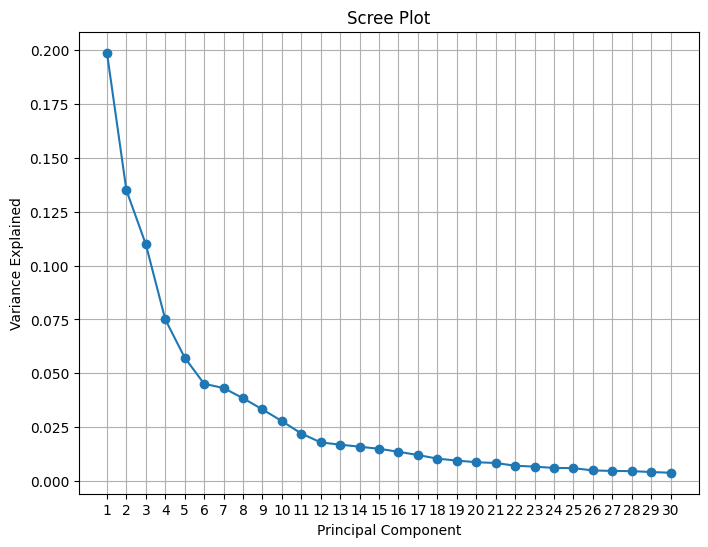

In [55]:
import matplotlib.pyplot as plt

# Variance explained by individual PCs
pca_score = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca_score) + 1), pca_score, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.xticks(range(1, len(pca_score) + 1))
plt.grid(True)

plt.savefig("variance.png",dpi=600)
plt.show()


In [56]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('mordred_descriptors_updated_agonist.csv')

# Extract the SMILES column from the DataFrame
smiles_list = df['SMILES'].tolist()

# Print the list of SMILES
print(smiles_list)

['CCCCOC(=O)C(C)OC(=O)CCC', 'CCCCC(=O)O', 'CC(C)CCC(=O)O', 'C1C2CC(C1C=C2)C(=O)O', 'CCCC(C)C(=O)O', 'CCC(C)CC(=O)O', 'CCCCCCCC=CC(=O)O', 'CC(C)CC(=O)O', 'CCCCCCCCC(=O)O', 'CCCC(=O)O', 'CCC(C)C(=O)O', 'C1CC(C1)C(=O)O', 'C1=CC=C(C=C1)C=O', 'CC(C(C)O)O', 'C1=CC=C2C(=C1)C=CC(=O)O2', 'CCCCCCCC(=O)O', 'CCCCCCCC=O', 'C1=CC=C(C=C1)C(=O)C2=CC=CC=C2', 'COC1=C(C=C(C=C1)CC=C)OC', 'CC1=CC=C(C=C1)C(C)C', 'CCCCCCCC1CCC(=O)O1', 'CCCCCCCC(=O)OCC', 'C1CCNCC1', 'CCCCCCC(=O)O', 'CCCCCCC=CC(=O)O', 'CCCCCC(C)CCC(=O)O', 'CCCCCCN', 'CCCCCCO', 'CCCCCCCCS', 'CC(=O)OCC1=CC=CC=C1', 'CCCCCCOC(=O)C', 'CCCCCOC(=O)CC', 'C=CCOC(=O)CC1=CC=CC=C1', 'CCCCCC(=O)O', 'CCCCCCCCC=O', 'CCCCCC(=O)C=C', 'CC1=CCC(CC1=O)C(=C)C', 'CC(=CCCC(=CCO)C)C', 'CCCC=CC=O', 'COC1=CC=CC=C1O', 'CCC(=O)[O-]', 'CCCCCCCO', 'CCCCCCC=O', 'COC(=O)C1=CC=CC=C1O', 'CC1CCC(C(C1)O)C(C)C', 'CC1=C(C=C(C=C1)[N+](=O)[O-])[N+](=O)[O-]', 'CSSC', 'CSSCC1=CC=CO1', 'CCCCCO', 'CCC=O', 'C1=CN=CC=N1', 'CC(C)CCOC(=O)C', 'CCC(=O)O', 'CC12CCC3C(C1CCC2=O)CCC4=CC(=O)CCC34C

In [57]:
!pip install pubchempy


### The next code performs K-means clustering on the PCA obtained data, to help understand the inherent patterns and groupings within the data. The SMILES present at the centroid of each clusters provide insight into the most common structural features within the cluster. This reduces the complexity of analyzing and highlights the key features of each clusters.

### The Scatter plot visualizes the clusters and the SMILES present at the centroid of each clusters, conveying the nature of the clusters.

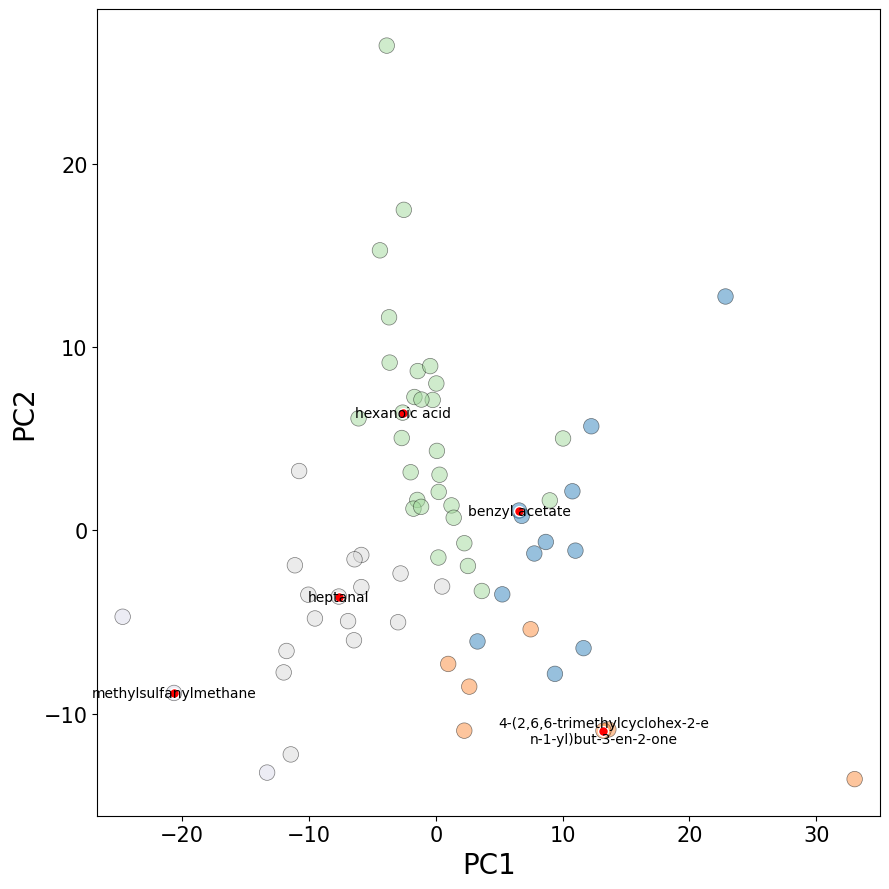

In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pubchempy as pcp

# Load the CSV file into a DataFrame
df = pd.read_csv('mordred_descriptors_updated_agonist.csv')

# Convert index to integer and drop rows with missing values
df.index = df.index.astype(int)
df.dropna(axis=0, inplace=True)

# Create a DataFrame containing only numeric features for scaling and PCA
X_data = df.drop(columns=['SMILES'])
X_all = np.array(X_data)
X_all_ids = np.array(df.index)

scaler = StandardScaler()
X_all_sc = scaler.fit_transform(X_all)

pca = PCA(n_components=30)
X_all_pca = pca.fit_transform(X_all_sc)

# Your existing code for clustering
nclusters = 5    # choose number of clusters
X_use = X_all_pca
X_main_ids = X_all_ids
X_kmeans = X_all_pca
kmeans = KMeans(n_clusters=nclusters, random_state=42).fit(X_kmeans)
dists = []
for x in range(len(X_kmeans)):
    delta = [X_kmeans[x, i] - kmeans.cluster_centers_[kmeans.labels_[x], i] for i in range(len(X_kmeans[0]))]
    dist = np.linalg.norm(delta)
    dists.append(dist)
clusters = {}
clusterdists = {}
clustermins = []
clusterorders_dict = {}
clusterorders = np.zeros(X_kmeans.shape[0])
for x in range(nclusters):
    clusters[x] = [i for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == x]
    clusterdists[x] = [dists[i] for i in clusters[x]]
    clustermins.append(clusters[x][clusterdists[x].index(min(clusterdists[x]))])
    clusterorders_dict[x] = [y for _, y in sorted(zip(clusterdists[x], clusters[x]))]
    for i in clusters[x]:
        clusterorders[i] = clusterorders_dict[x].index(i) + 1

f_ind_1 = 0
f_ind_2 = 1
x_min, x_max = X_kmeans[:, f_ind_1].min() - 2, X_kmeans[:, f_ind_1].max() + 2
y_min, y_max = X_kmeans[:, f_ind_2].min() - 2, X_kmeans[:, f_ind_2].max() + 2

# Function to convert SMILES to IUPAC name
def smiles_to_iupac(smiles):
    try:
        compound = pcp.get_compounds(smiles, 'smiles')
        if compound:
            iupac_name = compound[0].iupac_name
            return iupac_name
        else:
            print(f"Failed to convert SMILES: {smiles}")
            return "Unknown"
    except Exception as e:
        print(f"Error converting SMILES: {smiles}, Exception: {e}")
        return "Unknown"

# Calculate IUPAC names for all SMILES at centroids
iupac_at_centroids = [smiles_to_iupac(df.loc[X_main_ids[centroid_index]]['SMILES']) for centroid_index in clustermins]

# Plot the scatter plot with centroids and IUPAC names
plt.figure(figsize=(9, 9))
extent = [x_min, x_max, y_min, y_max]
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(r"PC1", fontsize=20)
plt.ylabel(r"PC2", fontsize=20)
plt.locator_params(axis='y', nbins=8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
mapping = kmeans.labels_
cMap = "tab20c"
plt.scatter(X_kmeans[:, f_ind_1], X_kmeans[:, f_ind_2], c=mapping, cmap=cMap, alpha=.5, marker=".", s=500, edgecolor="black", linewidth=0.5)

# Plot the centroids with improved markers and annotate them with IUPAC names
for i, centroid_index in enumerate(clustermins):
    centroid_x = X_kmeans[centroid_index, f_ind_1]
    centroid_y = X_kmeans[centroid_index, f_ind_2]
    iupac_name = iupac_at_centroids[i]
    # Draw the centroid marker as a circle with a different color and size
    plt.scatter(centroid_x, centroid_y, color='red', marker='.', s=200, edgecolor='white', zorder=2)
    # Annotate the centroid with the wrapped IUPAC name using text wrapping
    plt.text(centroid_x, centroid_y, "\n".join([iupac_name[i:i+30] for i in range(0, len(iupac_name), 30)]), fontsize=10, ha='center', va='center', wrap=True, zorder=3)

plt.tight_layout()
plt.savefig("mordred_pca_plot_with_iupac.png", dpi=600)
plt.show()


## The following code comprises of multiple methods which explain why n=5 is the optimal number of clusters.

#### Akaike Information Crtierion(AIC) and Bayesian Information Criterion(BIC) are statistical models for calculating the optimal number of clusters. Silhouette Score is a metric used to quantify the goodness of clusterings.

In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

nclusters = 5  # choose number of cluster
####################################################################################

X_use = X_all_pca
X_main_ids = X_all_ids
X_kmeans = X_all_pca

kmeans = KMeans(n_clusters=nclusters, random_state=42).fit(X_kmeans)

dists = []
for x in range(len(X_kmeans)):
    delta = [X_kmeans[x,i]-kmeans.cluster_centers_[kmeans.labels_[x],i] for i in range(len(X_kmeans[0]))]
    dist = np.linalg.norm(delta)
    dists.append(dist)

clusters = {}
clusterdists = {}
clustermins=[]
clusterorders_dict={}
clusterorders=np.zeros(X_kmeans.shape[0])

for x in range(nclusters):
    clusters[x] =[i for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == x]
    clusterdists[x]=[dists[i] for i in clusters[x]]
    clustermins.append(clusters[x][clusterdists[x].index(min(clusterdists[x]))])
    clusterorders_dict[x]=[y for _,y in sorted(zip(clusterdists[x],clusters[x]))]

for i in clusters:
     print("Cluster", i+1, ":", len(clusters[i]), "data points")

# Calculate BIC and AIC scores
from sklearn.cluster import KMeans

# ...

bic_scores=[]
aic_scores=[]

for k_value in range(2, nclusters + 1):
    kmeans_k = KMeans(n_clusters=k_value, random_state=42)
    kmeans_k.fit(X_kmeans)

    # BIC calculation
    bic_score = (-2 * kmeans_k.score(X_kmeans) + np.log(len(X_kmeans)) * k_value * np.log(len(X_kmeans)))

    # AIC calculation
    aic_score = (-2 * kmeans_k.score(X_kmeans) + 2 * len(kmeans_k.cluster_centers_) * X_kmeans.shape[1])

    bic_scores.append(bic_score)
    aic_scores.append(aic_score)

best_k_bic=np.argmin(bic_scores)+2
best_k_aik =np.argmin(aic_scores)+2

print("Best number of clusters based on BIC:", best_k_bic)
print("Best number of clusters based on AIC:", best_k_aik)

# Calculate Silhouette Score

labels=kmeans.labels_
silhouette_avg=silhouette_score(X_use, labels)
print("Silhouette Score for", nclusters, "clusters:", silhouette_avg)



Cluster 1 : 12 data points
Cluster 2 : 7 data points
Cluster 3 : 29 data points
Cluster 4 : 3 data points
Cluster 5 : 16 data points
Best number of clusters based on BIC: 5
Best number of clusters based on AIC: 5
Silhouette Score for 5 clusters: 0.150564970434765


### The value of the silhouette ranges between [1, -1], where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
#### Since the AIC and BIC scores for n=k is K, we take other methods into consideration.
### The follwing code calculates the Davies Bouldin index, Calinski Harabasz Index, Silhouette score and the Elbow method.

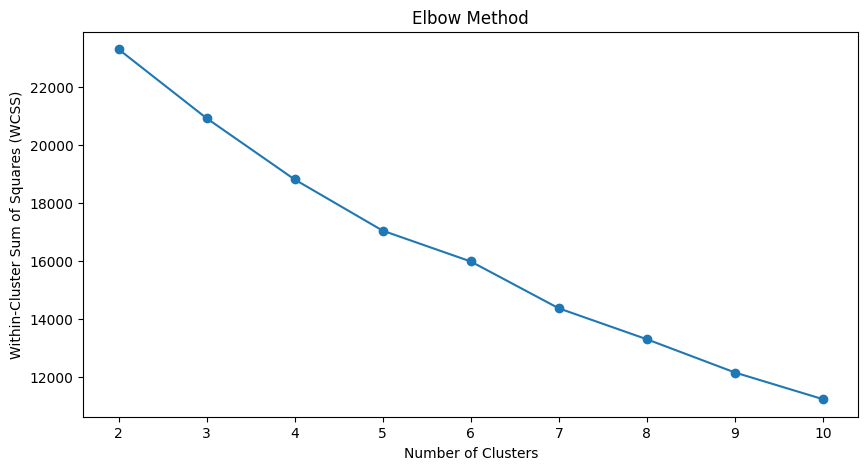

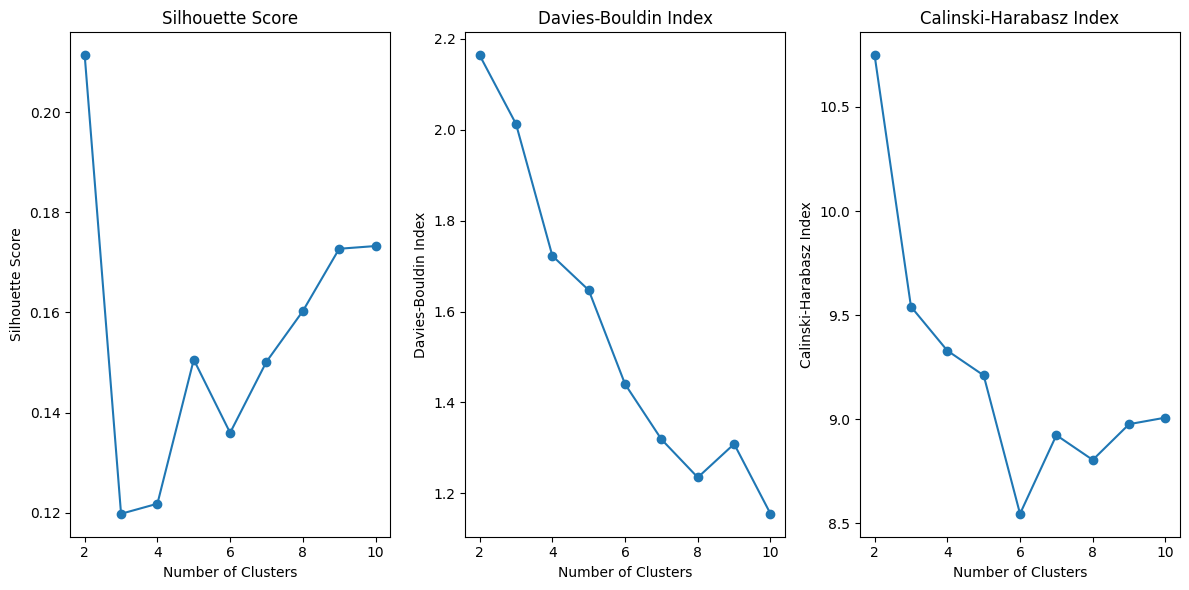

In [64]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Code for PCA and data preparation

# Range of cluster counts to consider
cluster_range = range(2, 11)  # You can adjust this range

# Lists to store evaluation scores
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
wcss = []  # Within-cluster sum of squares for elbow method

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_all_pca)
    
    # Silhouette Score
    silhouette_scores.append(silhouette_score(X_all_pca, kmeans.labels_))
    
    # Davies-Bouldin Index
    davies_bouldin_scores.append(davies_bouldin_score(X_all_pca, kmeans.labels_))
    
    # Calinski-Harabasz Index
    calinski_harabasz_scores.append(calinski_harabasz_score(X_all_pca, kmeans.labels_))
    
    # WCSS for elbow method
    wcss.append(kmeans.inertia_)

# Plotting Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

# Plotting Gap Statistic, Davies-Bouldin Index, and Calinski-Harabasz Index
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(cluster_range, davies_bouldin_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index')

plt.subplot(1, 3, 3)
plt.plot(cluster_range, calinski_harabasz_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index')

plt.tight_layout()
plt.show()


#### The Davies-Bouldin plot begins to stabilize at n=5, in the Calinski-harabaz plot we see that one of its peak is reached at n=5 both of which suggest n=5 is an optimal number of clusters in our context. The sihouette score also supports n=5. While the elbow plot begins to flatten after and before n=6, n=5 is a more appropriate choice of clusters.

# The structures closest to the centroids are printed below


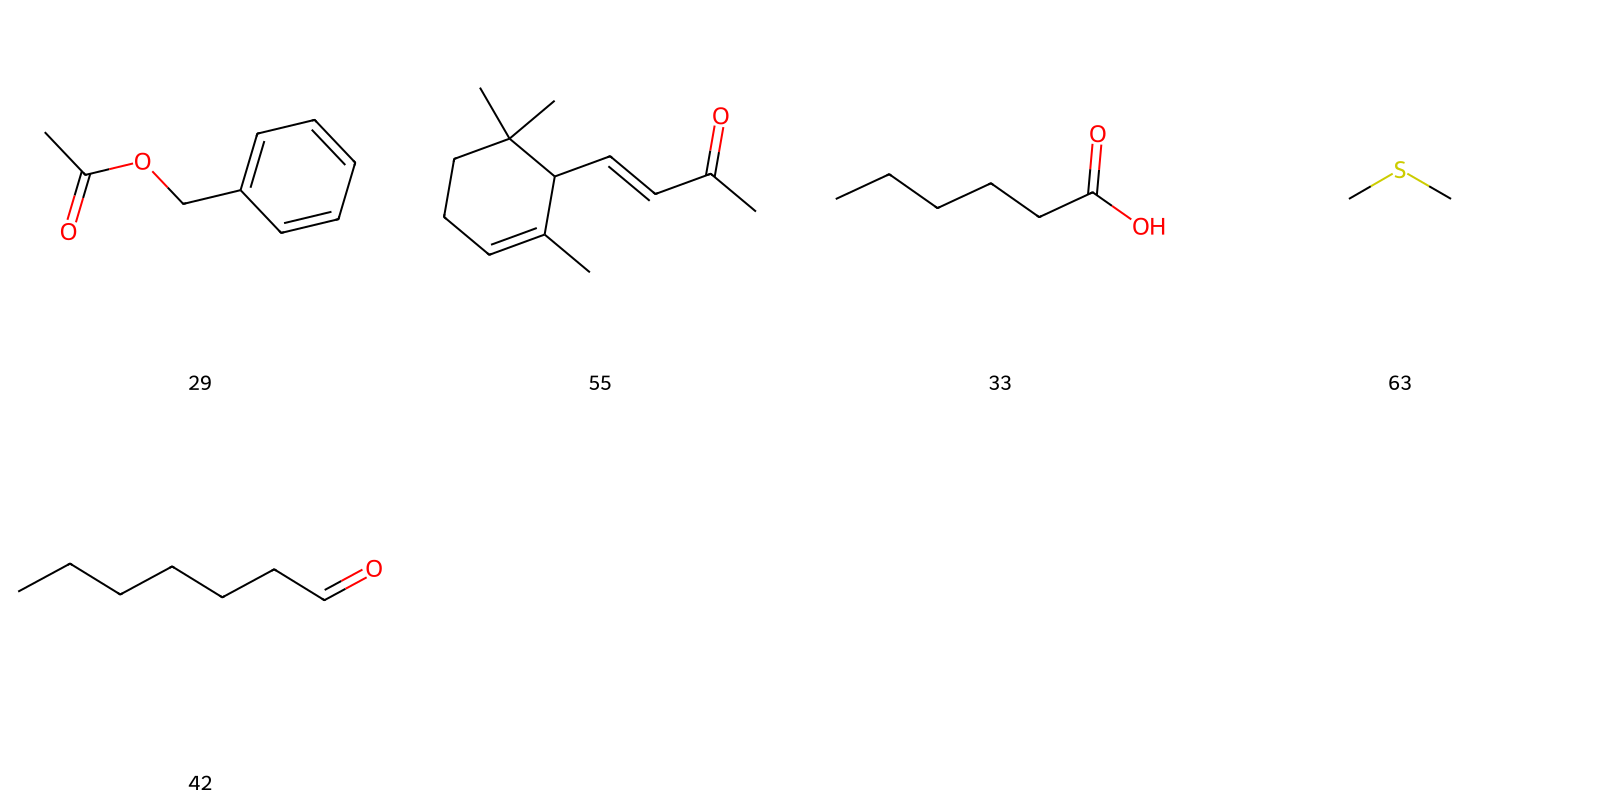

In [65]:
smiles = list(mols['SMILES'])

closest_to_centroids = []
for i in clustermins:
    closest_to_centroids.append(smiles[i])

count=0
subms = []
for i in closest_to_centroids:
    x = Chem.MolFromSmiles(i)
    count+=1
    subms.append(x)
clustermins_str = [str(i) for i in clustermins]
my_labels = clustermins_str
molsPerRow = 4
subImgSize= (400,400)
nRows = -(count // -molsPerRow)
fullSize = (molsPerRow * subImgSize[0], nRows * subImgSize[1])
img = rdMolDraw2D.MolDraw2DCairo(fullSize[0],fullSize[1],subImgSize[0], subImgSize[1]) # setting up the image
img.drawOptions().legendFontSize=20
img.DrawMolecules(subms[:],legends=my_labels[:])
img.SetFontSize(40)
img.FinishDrawing()

with open('centroids.png','wb+') as wfp:      # opening a png file, goes into current folder
    wfp.write(img.GetDrawingText())           # saving in the image
Image.open('centroids.png')                   # opening it in the notebook

In [66]:
smiles = list(mols['SMILES'])

centroid_smiles = []
for i, centroid_index in enumerate(clustermins):
    centroid_smiles.append(smiles[centroid_index])
    print(f"Cluster {i+1} centroid SMILES: {smiles[centroid_index]}")

Cluster 1 centroid SMILES: CC(=O)OCC1=CC=CC=C1
Cluster 2 centroid SMILES: CC1=CCCC(C1C=CC(=O)C)(C)C
Cluster 3 centroid SMILES: CCCCCC(=O)O
Cluster 4 centroid SMILES: CSC
Cluster 5 centroid SMILES: CCCCCCC=O


# Co-relation Analysis for the selected descriptors over the range of molecules.
First, we take 7 descriptors that define the drug-likliness and odor-ness of our molecules.
These include:
1) Quantitative Estimate of Druglikeness
2) Logp(lipophilicity)
3) Molecular Weight
4) Topology Polar Surface Area
5) Number of Rotatable Bonds
6) Radius of Gyration

In [67]:
from rdkit import Chem
from rdkit.Chem import Descriptors, QED, MolSurf
from rdkit.Chem.rdMolDescriptors import CalcNumRotatableBonds
from rdkit.Chem import Descriptors3D
import pandas as pd

In [68]:
# Define the list of SMILES strings
smiles_list = ["CCC(=O)O", "CC(=O)OCC1=CC=CC=C1", "CCCCCCC=O", "CCCCCC(=O)O", "CSC",
             "CC1=C(C(CCC1)(C)C)/C=C/C(=O)C"]

# Initialize empty lists to store calculated properties
qed_values = []
logp_values = []
mol_weight_values = []
tpsa_values = []
num_rotatable_bonds_values = []

for smiles in smiles_list:
    # Create molecule object
    molecule = Chem.MolFromSmiles(smiles)

    # Calculate properties and append to respective lists
    qed_values.append(QED.qed(molecule))
    logp_values.append(Descriptors.MolLogP(molecule))
    mol_weight_values.append(Descriptors.MolWt(molecule))
    tpsa_values.append(Descriptors.TPSA(molecule))
    num_rotatable_bonds_values.append(Descriptors.NumRotatableBonds(molecule))

# Create dataframe
df = pd.DataFrame({
    'SMILES': smiles_list,
    'QED': qed_values,
    'LogP': logp_values,
    'Molecular_Weight': mol_weight_values,
    'Topological_Polar_Surface_Area': tpsa_values,
    'Number_of_Rotatable_Bonds': num_rotatable_bonds_values,
})

# Save dataframe to a CSV file
df.to_csv("plot_data.csv", index=False)


### Calculating Radius of Gyration

In [69]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors3D

In [70]:
# Define the list of SMILES strings
smiles_list = ["CCC(=O)O", "CC(=O)OCC1=CC=CC=C1", "CCCCCCC=O", "CCCCCC(=O)O",
                "CSC", "CC1=CCCC(C1C=CC(=O)C)(C)C"]

radius_of_gyration = []

for smiles in smiles_list:
    # Create a molecule from the SMILES string
    molecule = Chem.MolFromSmiles(smiles)

    # Add hydrogens to the molecule
    molecule = Chem.AddHs(molecule)

    # Generate a 3D conformation using the ETKDG method
    AllChem.EmbedMolecule(molecule, AllChem.ETKDG())

    # Compute the descriptors
    radius_of_gyration.append(Descriptors3D.RadiusOfGyration(molecule))


# Load the existing DataFrame
df = pd.read_csv("plot_data.csv")

# Add the radius of gyration to the DataFrame
df['RadiusOfGyration'] = radius_of_gyration

# Save the updated DataFrame back to the CSV file
df.to_csv("plot_data.csv", index=False)

In [71]:
df_updated = pd.read_csv("plot_data.csv")
df_updated

,SMILES,QED,LogP,Molecular_Weight,Topological_Polar_Surface_Area,Number_of_Rotatable_Bonds,RadiusOfGyration
0,CCC(=O)O,0.490845,0.4810,74.079,37.30,1,1.539733
1,CC(=O)OCC1=CC=CC=C1,0.600173,1.7497,150.177,26.30,2,2.443435
2,CCCCCCC=O,0.395123,2.1557,114.188,17.07,5,2.662401
3,CCCCCC(=O)O,0.566873,1.6513,116.160,37.30,4,2.633031
4,CSC,0.402817,0.9792,62.137,0.00,0,1.243784
5,CC1=C(C(CCC1)(C)C)/C=C/C(=O)C,0.610150,3.6582,192.302,17.07,2,2.804423


In [72]:
import pandas as pd
import pubchempy as pcp

# Load the data
df = pd.read_csv('plot_data.csv')

# List of SMILES strings
smiles_list = df['SMILES'].tolist()

# Initialize list to store common names
common_names = []

# Loop over the list
for smiles in smiles_list:
    # Check if SMILES string is not None
    if smiles is not None:
        # Get the compound from PubChem
        compounds = pcp.get_compounds(smiles, 'smiles')

        # Check if a compound was found
        if compounds:
            compound = compounds[0]
            # Add the common name to the list
            common_names.append(compound.synonyms[0] if compound.synonyms else None)
        else:
            common_names.append(None)
    else:
        common_names.append(None)

# Add the common names as a new column to the dataframe
df.insert(0, 'Common_name', common_names)

# Save the DataFrame to a new CSV file
df.to_csv("plot_data_with_names.csv", index=False)

df.head(7)



,Common_name,SMILES,QED,LogP,Molecular_Weight,Topological_Polar_Surface_Area,Number_of_Rotatable_Bonds,RadiusOfGyration
0,propionic acid,CCC(=O)O,0.490845,0.4810,74.079,37.30,1,1.539733
1,BENZYL ACETATE,CC(=O)OCC1=CC=CC=C1,0.600173,1.7497,150.177,26.30,2,2.443435
2,Heptanal,CCCCCCC=O,0.395123,2.1557,114.188,17.07,5,2.662401
3,HEXANOIC ACID,CCCCCC(=O)O,0.566873,1.6513,116.160,37.30,4,2.633031
4,dimethyl sulfide,CSC,0.402817,0.9792,62.137,0.00,0,1.243784
5,BETA-IONONE,CC1=C(C(CCC1)(C)C)/C=C/C(=O)C,0.610150,3.6582,192.302,17.07,2,2.804423


## Heatmap generation -  The above analysis is further used to create a heatmap to visually represent the relationship between the descriptors.

                                     QED      LogP  Molecular_Weight  \
QED                             1.000000  0.464706          0.753377   
LogP                            0.464706  1.000000          0.904536   
Molecular_Weight                0.753377  0.904536          1.000000   
Topological_Polar_Surface_Area  0.493444 -0.197668          0.092794   
Number_of_Rotatable_Bonds       0.000717  0.369409          0.312309   
RadiusOfGyration                0.531937  0.793574          0.834098   

                                Topological_Polar_Surface_Area  \
QED                                                   0.493444   
LogP                                                 -0.197668   
Molecular_Weight                                      0.092794   
Topological_Polar_Surface_Area                        1.000000   
Number_of_Rotatable_Bonds                             0.327489   
RadiusOfGyration                                      0.282422   

                                

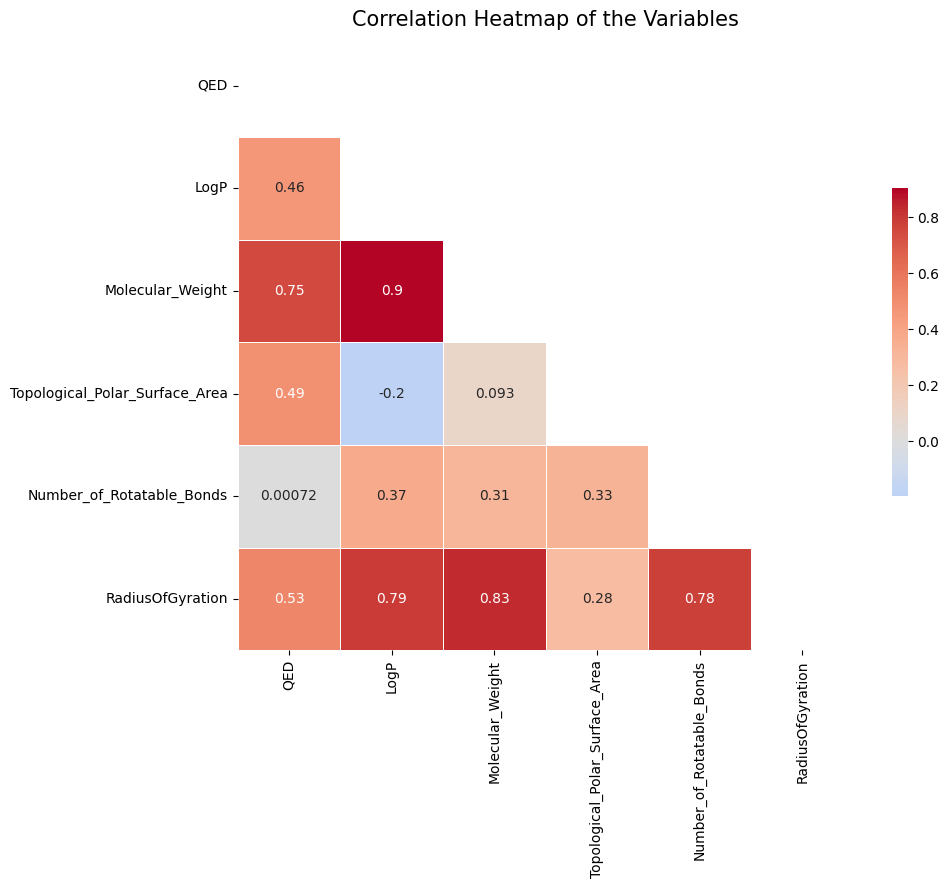

In [73]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the csv file
data = pd.read_csv('plot_data_with_names.csv')

# Select only the numeric columns for the correlation analysis
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix using Pearson's correlation coefficient
correlation_matrix = numeric_data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Set the size of the figure
plt.figure(figsize=(10, 8))

# Generate a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Set the title of the figure
plt.title('Correlation Heatmap of the Variables', fontsize=15)

# Show the plot
plt.savefig("Corelation_heat_plot.png",dpi=600)
plt.show()


## The correlation analysis is extended to the appended list of the 62 odorants and the 10 most similar molecules.

In [74]:
from rdkit import Chem
from rdkit.Chem import Descriptors, QED, MolSurf
from rdkit.Chem.rdMolDescriptors import CalcNumRotatableBonds
from rdkit.Chem import Descriptors3D
import pandas as pd

In [75]:

input_csv_file = "or_agonist_update_2.csv"
data = pd.read_csv(input_csv_file)

# Extract SMILES column from the dataframe
smiles_list = data["SMILES"].tolist()

# Initialize empty lists to store calculated properties
qed_values = []
logp_values = []
mol_weight_values = []
tpsa_values = []
num_rotatable_bonds_values = []

for smiles in smiles_list:
    # Create molecule object
    molecule = Chem.MolFromSmiles(smiles)

    # Calculate properties and append to respective lists
    qed_values.append(QED.qed(molecule))
    logp_values.append(Descriptors.MolLogP(molecule))
    mol_weight_values.append(Descriptors.MolWt(molecule))
    tpsa_values.append(Descriptors.TPSA(molecule))
    num_rotatable_bonds_values.append(Descriptors.NumRotatableBonds(molecule))

# Create dataframe
df = pd.DataFrame({
    'SMILES': smiles_list,
    'QED': qed_values,
    'LogP': logp_values,
    'Molecular_Weight': mol_weight_values,
    'Topological_Polar_Surface_Area': tpsa_values,
    'Number_of_Rotatable_Bonds': num_rotatable_bonds_values,
})

# Save dataframe to a CSV file
df.to_csv('plotting_62X.csv', index=False)


### Calculating the Radius of Gyration

In [76]:

input_csv_file = "or_agonist_update_2.csv"
data = pd.read_csv(input_csv_file)

# Extract SMILES column from the dataframe
smiles_list = data["SMILES"].tolist()
radius_of_gyration = []

for smiles in smiles_list:
    # Create a molecule from the SMILES string
    molecule = Chem.MolFromSmiles(smiles)

    # Add hydrogens to the molecule
    molecule = Chem.AddHs(molecule)

    # Generate a 3D conformation using the ETKDG method
    AllChem.EmbedMolecule(molecule, AllChem.ETKDG())

    # Compute the descriptors
    radius_of_gyration.append(Descriptors3D.RadiusOfGyration(molecule))


# Load the existing DataFrame
df = pd.read_csv('plotting_62X.csv')

# Add the radius of gyration to the DataFrame
df['RadiusOfGyration'] = radius_of_gyration

# Save the updated DataFrame back to the CSV file
df.to_csv('plotting_62X.csv', index=False)

In [77]:
df_updated = pd.read_csv('plotting_62X.csv')
df_updated

,SMILES,QED,LogP,Molecular_Weight,Topological_Polar_Surface_Area,Number_of_Rotatable_Bonds,RadiusOfGyration
0,CCCCOC(=O)C(C)OC(=O)CCC,0.482575,2.06150,216.277,52.60,7,3.578916
1,CCCCC(=O)O,0.582072,1.26120,102.133,37.30,3,1.844328
2,CC(C)CCC(=O)O,0.606401,1.50720,116.160,37.30,3,2.324488
3,C1C2CC(C1C=C2)C(=O)O,0.554076,1.28320,138.166,37.30,1,2.046455
4,CCCC(C)C(=O)O,0.606401,1.50720,116.160,37.30,3,2.147856
...,...,...,...,...,...,...,...
66,COC1=C(C=CC(=C1)C=C)O,0.698637,2.04380,150.177,29.46,2,2.450528
67,CSC,0.402817,0.97920,62.137,0.00,0,1.253174
68,CC(C)C1=NC=CN=C1OC,0.645356,1.60860,152.197,35.01,2,2.270509
69,CC/C=C/CC\C=C\C=O,0.246725,2.48790,138.210,17.07,5,3.065859


#### Generating the IUPAC/common name of the SMILES

In [78]:
import pandas as pd
import pubchempy as pcp

# Load the data
df = pd.read_csv('plotting_62X.csv')

# List of SMILES strings
smiles_list = df['SMILES'].tolist()

# Initialize list to store common names
common_names = []

# Loop over the list
for smiles in smiles_list:
    # Check if SMILES string is not None
    if smiles is not None:
        # Get the compound from PubChem
        compounds = pcp.get_compounds(smiles, 'smiles')

        # Check if a compound was found
        if compounds:
            compound = compounds[0]
            # Add the common name to the list
            common_names.append(compound.synonyms[0] if compound.synonyms else None)
        else:
            common_names.append(None)
    else:
        common_names.append(None)

# Add the common names as a new column to the dataframe
df.insert(0, 'Common_name', common_names)

# Save the DataFrame to a new CSV file
df.to_csv('plot_62X_with_names.csv', index=False)

df.head(7)



,Common_name,SMILES,QED,LogP,Molecular_Weight,Topological_Polar_Surface_Area,Number_of_Rotatable_Bonds,RadiusOfGyration
0,Butyl butyryllactate,CCCCOC(=O)C(C)OC(=O)CCC,0.482575,2.0615,216.277,52.6,7,3.578916
1,Valeric acid,CCCCC(=O)O,0.582072,1.2612,102.133,37.3,3,1.844328
2,4-METHYLPENTANOIC ACID,CC(C)CCC(=O)O,0.606401,1.5072,116.160,37.3,3,2.324488
3,120-74-1,C1C2CC(C1C=C2)C(=O)O,0.554076,1.2832,138.166,37.3,1,2.046455
4,2-Methylpentanoic acid,CCCC(C)C(=O)O,0.606401,1.5072,116.160,37.3,3,2.147856
5,3-Methylvaleric acid,CCC(C)CC(=O)O,0.606401,1.5072,116.160,37.3,3,2.128634
6,"cis-2-decenoic acid,CDA",CCCCCCCC=CC(=O)O,0.470804,2.9877,170.252,37.3,7,3.866961


## Heatmap Generation 

                                     QED      LogP  Molecular_Weight  \
QED                             1.000000  0.218801          0.444223   
LogP                            0.218801  1.000000          0.763344   
Molecular_Weight                0.444223  0.763344          1.000000   
Topological_Polar_Surface_Area  0.343696 -0.196977          0.276012   
Number_of_Rotatable_Bonds      -0.147834  0.589129          0.384491   
RadiusOfGyration                0.126821  0.814505          0.810926   

                                Topological_Polar_Surface_Area  \
QED                                                   0.343696   
LogP                                                 -0.196977   
Molecular_Weight                                      0.276012   
Topological_Polar_Surface_Area                        1.000000   
Number_of_Rotatable_Bonds                             0.070612   
RadiusOfGyration                                      0.171965   

                                

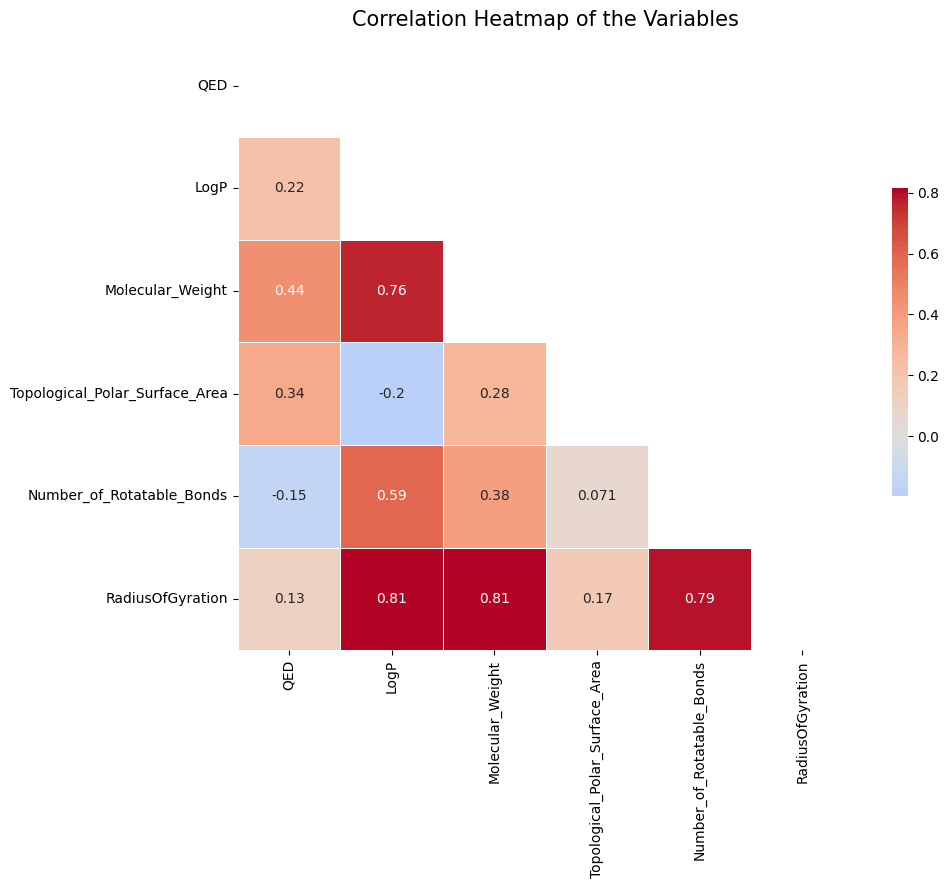

In [79]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the csv file
data = pd.read_csv('plot_62X_with_names.csv')

# Select only the numeric columns for the correlation analysis
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix using Pearson's correlation coefficient
correlation_matrix = numeric_data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Set the size of the figure
plt.figure(figsize=(10, 8))

# Generate a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Set the title of the figure
plt.title('Correlation Heatmap of the Variables', fontsize=15)

# Show the plot
plt.savefig("Corelation_62X_heat_plot.png",dpi=600)
plt.show()
